In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("data/data_pre_processing.csv")
df.sample(5)

,Unnamed: 0,reviews,clean_sentence_training,textblob_polarity,sentiment_textblob
351,351,"Not Verified | Good flight but boarding was chaos, was gifted with the beautiful A10 gate at LHR T5(, so we were bussed to the plane (first time I've used a bus gate there). The A320 was at T3 at a gate with a jetway, nevertheless 168 passengers (full flight) boarded via steps - this caused an hour waiting at the ""gate"" as well as the baggage taking ages. Also the seat recline on G-GATL (9f) is broken.",well age seat nevertheless flight Also boarded broken baggage step full waiting time GATL Good passenger beautiful gate used plane gifted boarding first jetway bussed Verified taking recline chaos A320 hour caused,0.38,Partially Positive
725,725,"✅ Trip Verified | Johannesburg to London. I booked a seat without luggage. Firstly one cannot make one booking for two passengers if only one has luggage. This caused an issue when trying to seat together. When the passenger without luggage tried to move seats (normally a free option for standard seats), you get advised that you have to pay. This was not disclosed when the booking was made. It was irritating because one of us was ill.",standard seat make move normally Firstly tried without option passenger Johannesburg cannot advised together This made luggage trying Trip issue Verified disclosed booking booked London free When caused irritating,0.06,Partially Positive
47,47,"✅ Trip Verified | We have flown repeatedly with British Airways and the One World alliance over the last few weeks. Every flight was delayed. Now we are back at the airport in Miami and have another massive delay so we will miss our connecting flight. Finally, our luggage arrived in Puerto Rico with a 3-day delay and we had to reschedule our round trip ... we haven't received any information about our luggage to this day, luckily we checked it ourselves at the airport and it was there. The last delayed flight meant the cabin crew that they too miss their connecting flights and we are on the same plane and they can't do anything. Wir sind in den letzten Wochen immer wieder mit Britisch Airways und dem One World Zusammenschluss geflogen. Jeder Flug war verspätet. Nun sitzen wir wieder in Miami am Flughafen und haben schon wieder eine massive Verspätung sodass wir unseren Anschlussflug verpassen werden. Zuletzt ist auch unser Gepäck mit 3 Tagen Verspätung in Puerto Rico angekommen und wir mussten unseren Rundreise umplanen… wir haben bis heute noch keine Info über unser Gepäck erhalten, zum Glück haben wir selbst am Flughafen nachgesehen und es war da… Beim letzten verpspäteten Flug meinte die Kabinen Crew dass auch sie ihre Anschlussflüge verpassen und wir im selben Flugzeug sitzen und sie können nichts machen.",keine checked Rundreise Airways crew World teten cabin haben Flug luckily verpassen miss Versp Puerto eine schon auch sitzen delayed versp arrived last noch Jeder alliance Anschlussfl anything plane meant ihre verpsp Every delay erhalten Tagen umplanen repeatedly mussten letzten machen Finally flight British geflogen nachgesehen Wochen airport trip Trip flown Crew Kabinen selben unser heute meinte nnen Rico soda received Zuletzt Britisch round werden wieder information das week back sind nichts immer angekommen unseren tung reschedule Anschlussflug Info massive another luggage Beim Miami Verified Flughafen Zusammenschluss selbst connecting Flugzeug,0.02,Neutral
903,903,"✅ Trip Verified | Amsterdam to London arrived 33 minutes late - three delays, taking off, landing, and getting the walkway to the airplane. This has happened twice this year. I fly KLM 90% of the time on this route and am delayed very rarely. I fly British on this route when it is significantly cheaper but am delayed. I’m sure it’s bad luck but if you do better than double the flight time you are having a good day.",significantly three flight arrived British minute airplane time good walkway sure This year double getting cheaper Trip Amsterdam Verified

DATA SUMMARY

In [2]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   int64  
 1   reviews                  1000 non-null   object 
 2   clean_sentence_training  1000 non-null   object 
 3   textblob_polarity        1000 non-null   float64
 4   sentiment_textblob       1000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


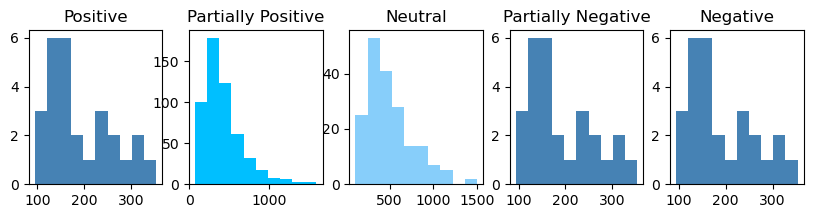

In [3]:
import matplotlib.pyplot as plt

fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5, figsize=(10,2))

dfca_len=df[df['sentiment_textblob']=='Positive']['clean_sentence_training'].str.len()
ax1.hist(dfca_len,color='steelblue')
ax1.set_title('Positive')

dfcb_len=df[df['sentiment_textblob']=='Partially Positive']['clean_sentence_training'].str.len()
ax2.hist(dfcb_len,color='deepskyblue')
ax2.set_title('Partially Positive')

dfcc_len=df[df['sentiment_textblob']=='Neutral']['clean_sentence_training'].str.len()
ax3.hist(dfcc_len,color='lightskyblue')
ax3.set_title('Neutral')

dfcd_len=df[df['sentiment_textblob']=='Partially Negative']['clean_sentence_training'].str.len()
ax4.hist(dfca_len,color='steelblue')
ax4.set_title('Partially Negative')

dfcd_len=df[df['sentiment_textblob']=='Negative']['clean_sentence_training'].str.len()
ax5.hist(dfca_len,color='steelblue')
ax5.set_title('Negative')

# fig.suptitle('Characters in sentences')
plt.show()

/var/folders/f5/kbfcrmn95sv4jsdhb1r3zj2w0000gn/T/ipykernel_16176/2380521378.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wordaa.map(lambda x: np.mean(x)),ax=ax1,color='steelblue')
/var/folders/f5/kbfcrmn95sv4jsdhb1r3zj2w0000gn/T/ipykernel_16176/2380521378.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

Text(0.5, 1.0, 'Negative')

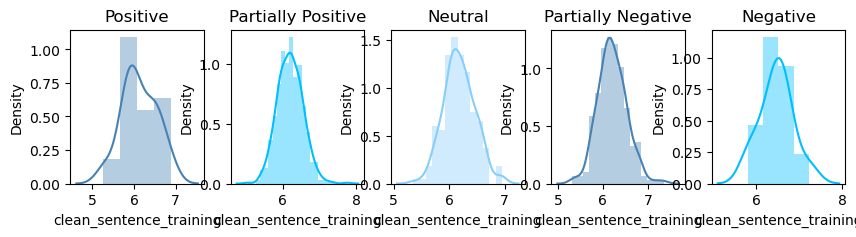

In [4]:
import seaborn as sns
import numpy as np

fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5, figsize=(10,2))

wordaa=df[df['sentiment_textblob']=='Positive']['clean_sentence_training'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordaa.map(lambda x: np.mean(x)),ax=ax1,color='steelblue')
ax1.set_title('Positive')

wordab=df[df['sentiment_textblob']=='Partially Positive']['clean_sentence_training'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordab.map(lambda x: np.mean(x)),ax=ax2,color='deepskyblue')
ax2.set_title('Partially Positive')

wordac=df[df['sentiment_textblob']=='Neutral']['clean_sentence_training'].apply(str).str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordac.map(lambda x: np.mean(x)),ax=ax3,color='lightskyblue')
ax3.set_title('Neutral')

wordac=df[df['sentiment_textblob']=='Partially Negative']['clean_sentence_training'].apply(str).str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordac.map(lambda x: np.mean(x)),ax=ax4,color='steelblue')
ax4.set_title('Partially Negative')

wordac=df[df['sentiment_textblob']=='Negative']['clean_sentence_training'].apply(str).str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordac.map(lambda x: np.mean(x)),ax=ax5,color='deepskyblue')
ax5.set_title('Negative')

# fig.suptitle('Average word length in each sentence')

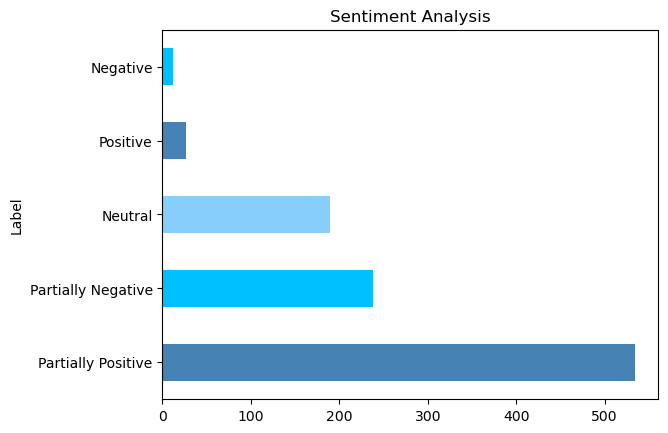

In [5]:
plt.title("Sentiment Analysis")

plt.ylabel("Label")
df["sentiment_textblob"].value_counts().plot(kind="barh", color=['steelblue', 'deepskyblue', 'lightskyblue'])
plt.show()

In [6]:
df["sentiment_textblob"].value_counts()

Partially Positive    534
Partially Negative    238
Neutral               189
Positive               27
Negative               12
Name: sentiment_textblob, dtype: int64

In [7]:
df["sentiment_textblob"].value_counts(normalize=True).to_frame().style.format('{:.2%}')

,sentiment_textblob
Partially Positive,53.40%
Partially Negative,23.80%
Neutral,18.90%
Positive,2.70%
Negative,1.20%


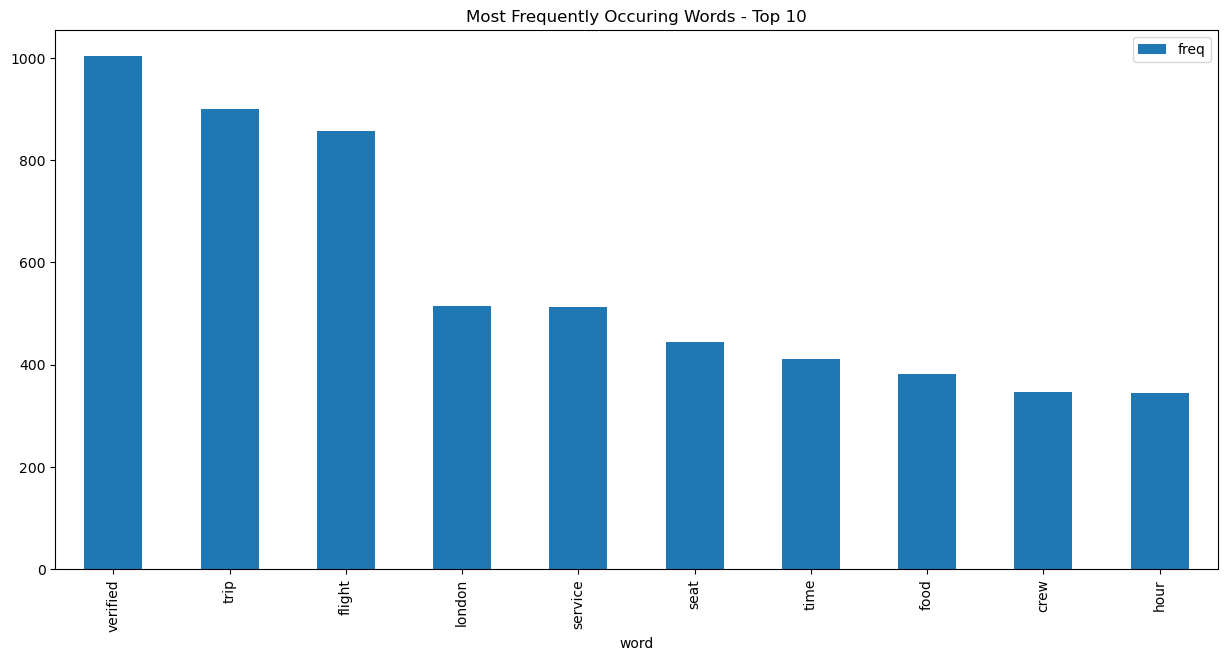

In [8]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
words = cv.fit_transform(df.clean_sentence_training.values.astype('U'))

sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(10).plot(x='word', y='freq', kind='bar', figsize=(15, 7))
plt.title("Most Frequently Occuring Words - Top 10")
plt.show()

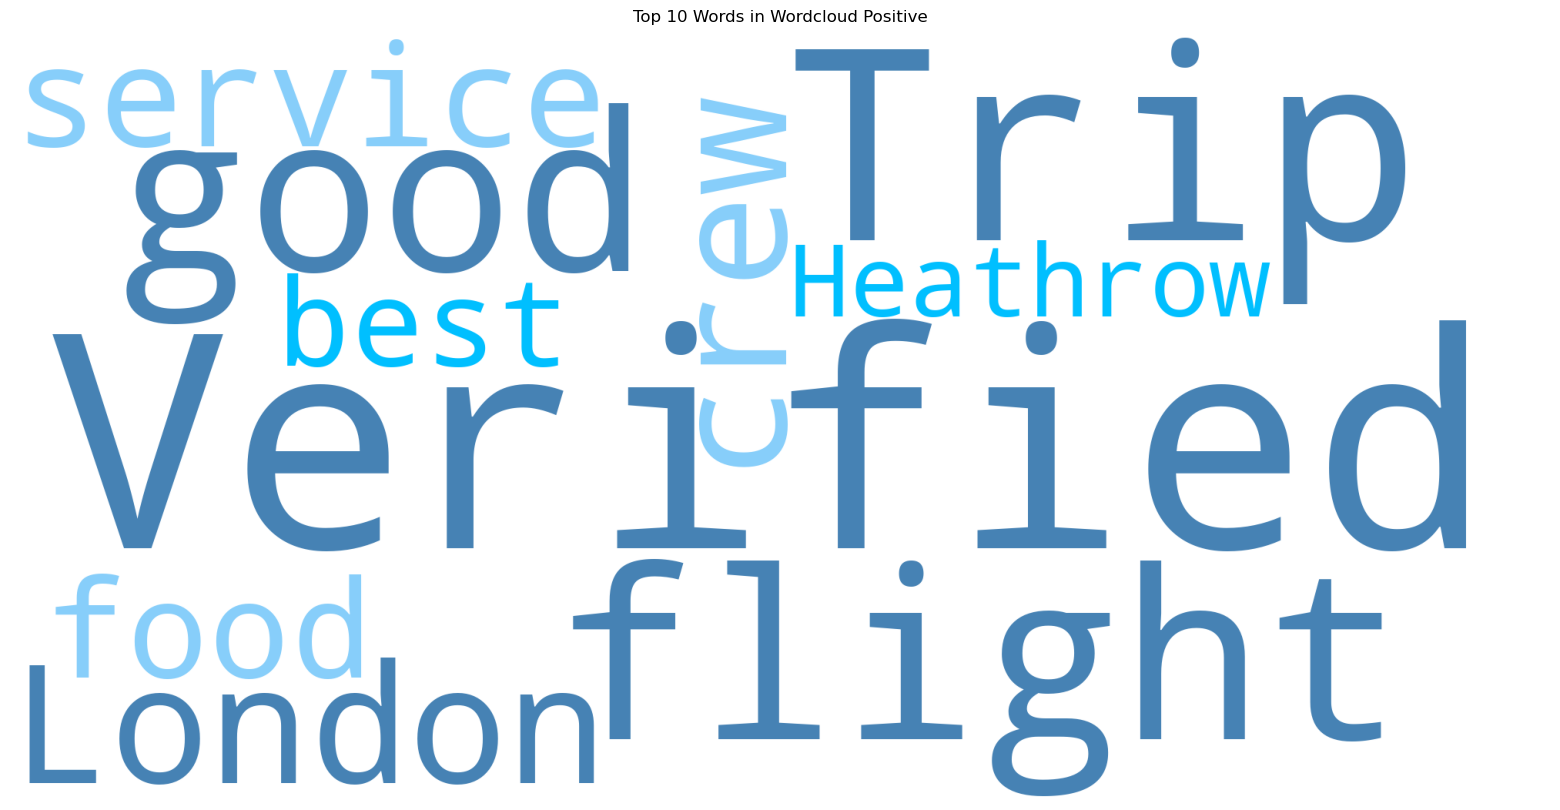

In [9]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#87CEFA", "#00BFFF", "#4682B4"]
    return np.random.choice(colors)

words = ' '.join([Text for Text in df[df['sentiment_textblob']=='Positive']['clean_sentence_training'].values.astype('U')])

# Get the frequency of each word
word_frequencies = {}
for word in words.split():
    word_frequencies[word] = word_frequencies.get(word, 0) + 1

# Get the top 10 words by frequency
top_words = dict(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10])

wordCloud = WordCloud(background_color='white', mode="RGB", width=2000, height=1000, color_func=color_func).generate_from_frequencies(top_words)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Top 10 Words in Wordcloud Positive")
plt.axis("off")
plt.show()

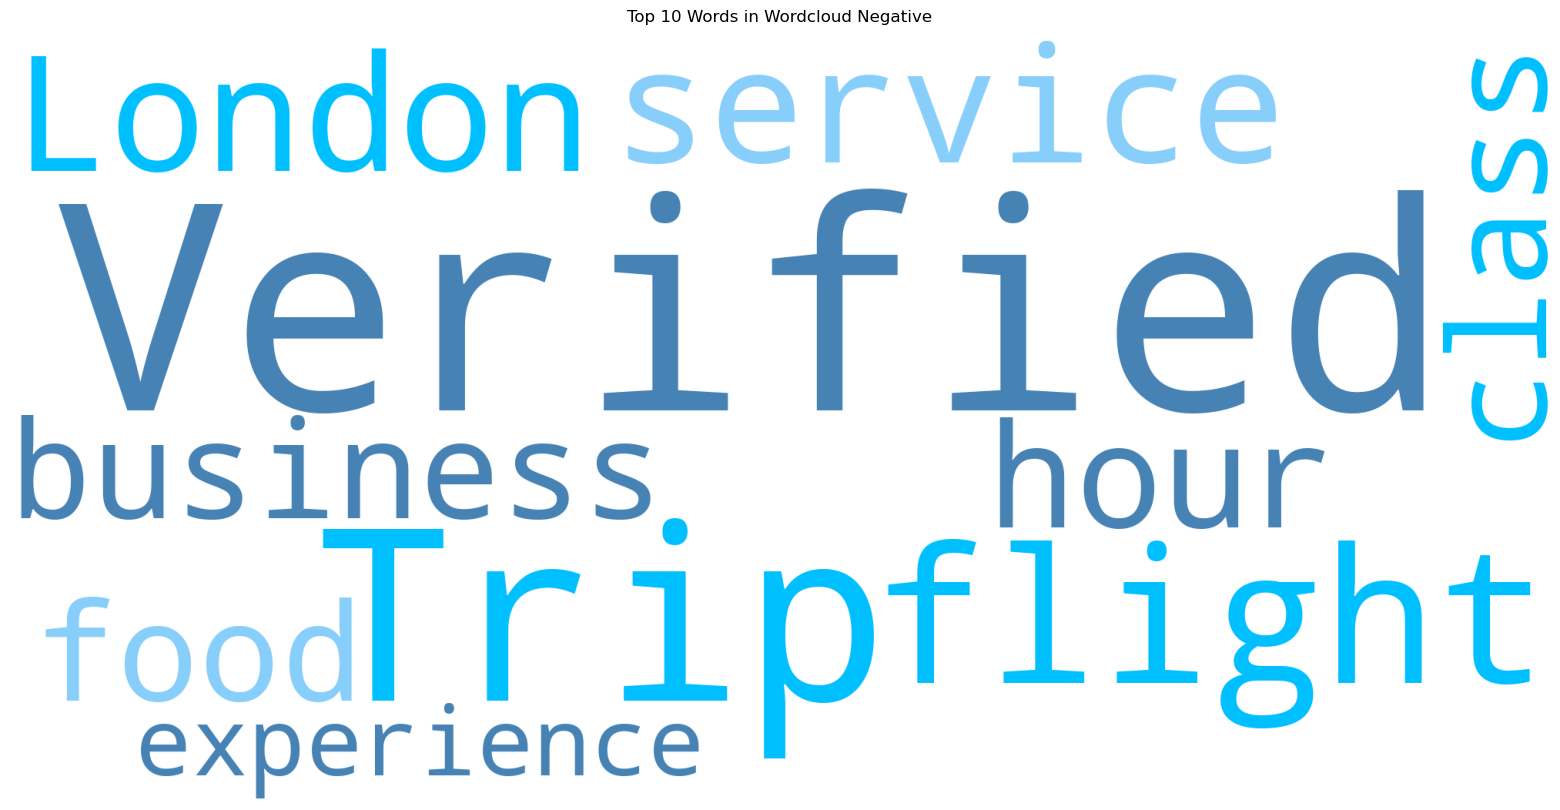

In [13]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#87CEFA", "#00BFFF", "#4682B4"]
    return np.random.choice(colors)

words = ' '.join([Text for Text in df[df['sentiment_textblob']=='Negative']['clean_sentence_training'].values.astype('U')])

# Get the frequency of each word
word_frequencies = {}
for word in words.split():
    word_frequencies[word] = word_frequencies.get(word, 0) + 1

# Get the top 10 words by frequency
top_words = dict(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10])

wordCloud = WordCloud(background_color='white', mode="RGB", width=2000, height=1000, color_func=color_func).generate_from_frequencies(top_words)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Top 10 Words in Wordcloud Negative")
plt.axis("off")
plt.show()

In [14]:
words_df = pd.DataFrame(frequency)

In [15]:

%%time
from textblob import TextBlob
def get_sub(Tweets):
    return TextBlob(Tweets).sentiment.subjectivity
def get_pol(Tweets):
    return TextBlob(Tweets).sentiment.polarity

words_df['subjectivity'] = words_df['word'].apply(get_sub)
words_df['textblob_words'] = words_df['word'].apply(get_pol)
words_df[['word', 'subjectivity', 'textblob_words']].round(2).head(10)#.reset_index(drop=True)

CPU times: user 1.85 s, sys: 143 ms, total: 2 s
Wall time: 2.21 s


,word,subjectivity,textblob_words
0,verified,0.0,0.0
1,trip,0.0,0.0
2,flight,0.0,0.0
3,london,0.0,0.0
4,service,0.0,0.0
5,seat,0.0,0.0
6,time,0.0,0.0
7,food,0.0,0.0
8,crew,0.0,0.0
9,hour,0.0,0.0


In [16]:
def tweet_analysis(score): 
    if score >= 0.5:
        return 'Positive'
    elif score >= 0.05 and score < 0.5:
        return 'Partially Positive'
    elif score > -0.05 and score < 0.05:
        return 'Neutral'
    elif score > -0.5 and score <= -0.05:
        return 'Partially Negative'
    else:
        return 'Negative'
words_df["textblob_word_label"] = words_df["textblob_words"].apply(tweet_analysis)
words_df[['word', 'textblob_word_label']].head(10)

,word,textblob_word_label
0,verified,Neutral
1,trip,Neutral
2,flight,Neutral
3,london,Neutral
4,service,Neutral
5,seat,Neutral
6,time,Neutral
7,food,Neutral
8,crew,Neutral
9,hour,Neutral


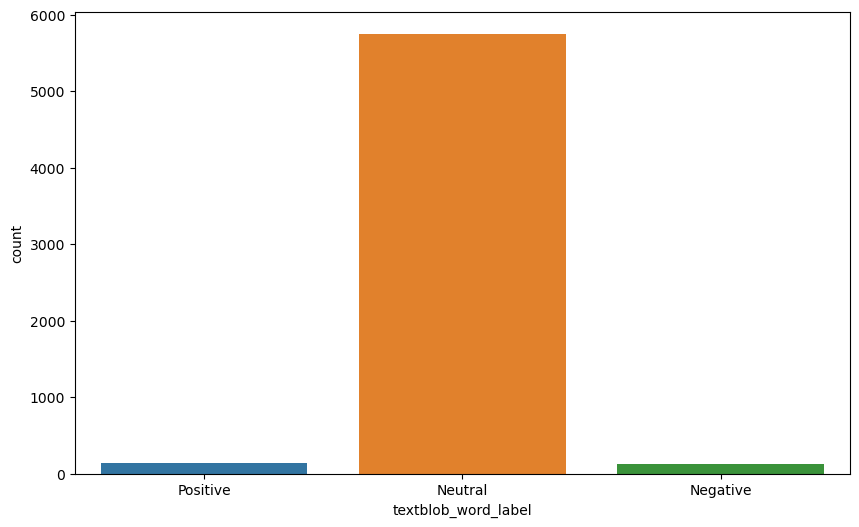

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=words_df, x='textblob_word_label', order=['Positive', 'Neutral', 'Negative'])
plt.show()

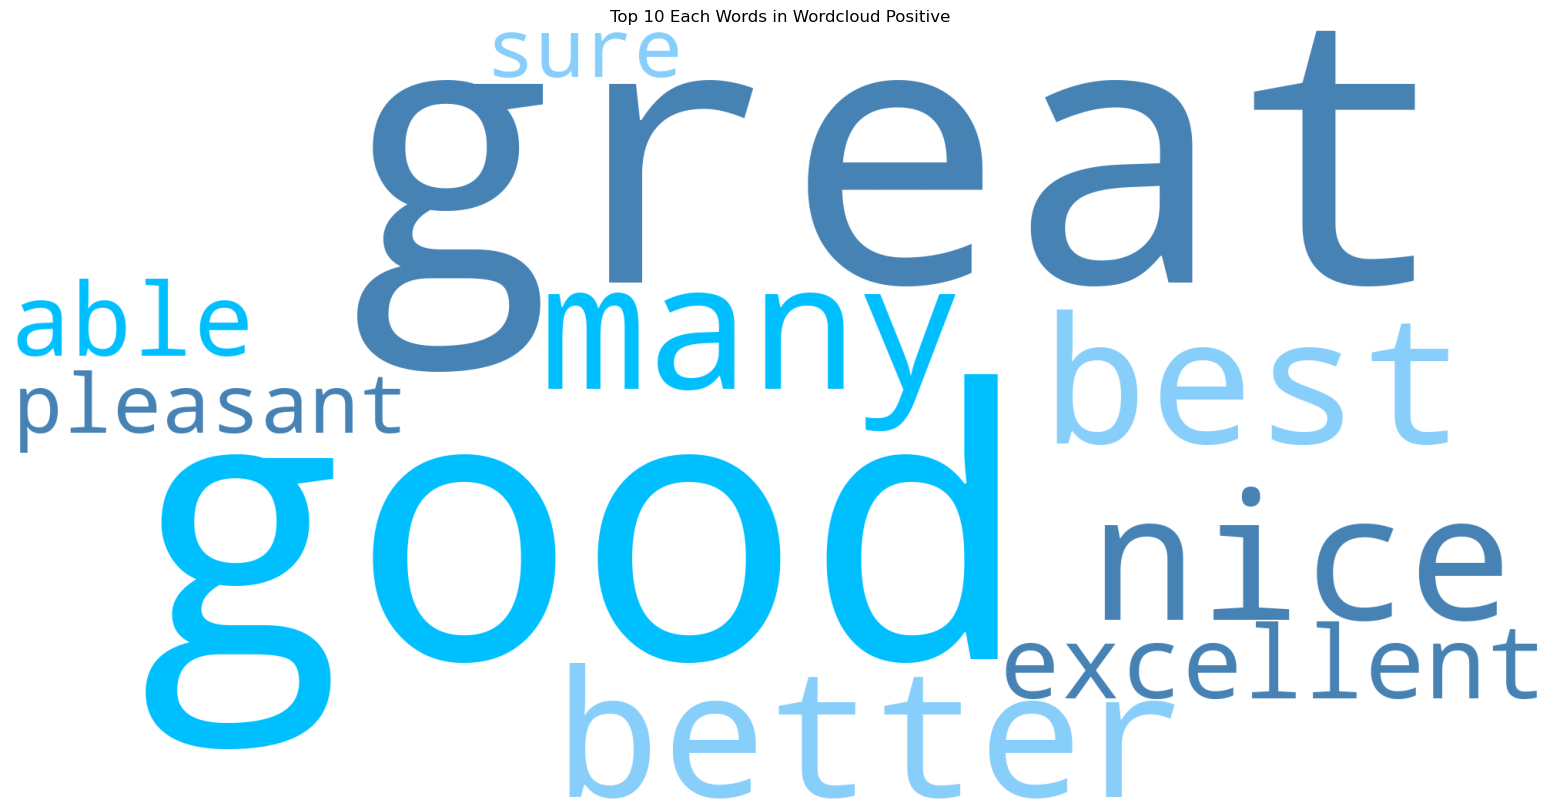

In [19]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#87CEFA", "#00BFFF", "#4682B4"]
    return np.random.choice(colors)

words = ' '.join([Text for Text in words_df[words_df['textblob_word_label']=='Positive']['word'].values.astype('U')])

# Get the frequency of each word
word_frequencies = {}
for word in words.split():
    word_frequencies[word] = word_frequencies.get(word, 0) + 1

# Get the top 10 words by frequency
top_words = dict(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10])

wordCloud = WordCloud(background_color='white', mode="RGB", width=2000, height=1000, color_func=color_func).generate_from_frequencies(top_words)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Top 10 Each Words in Wordcloud Positive")
plt.axis("off")
plt.show()

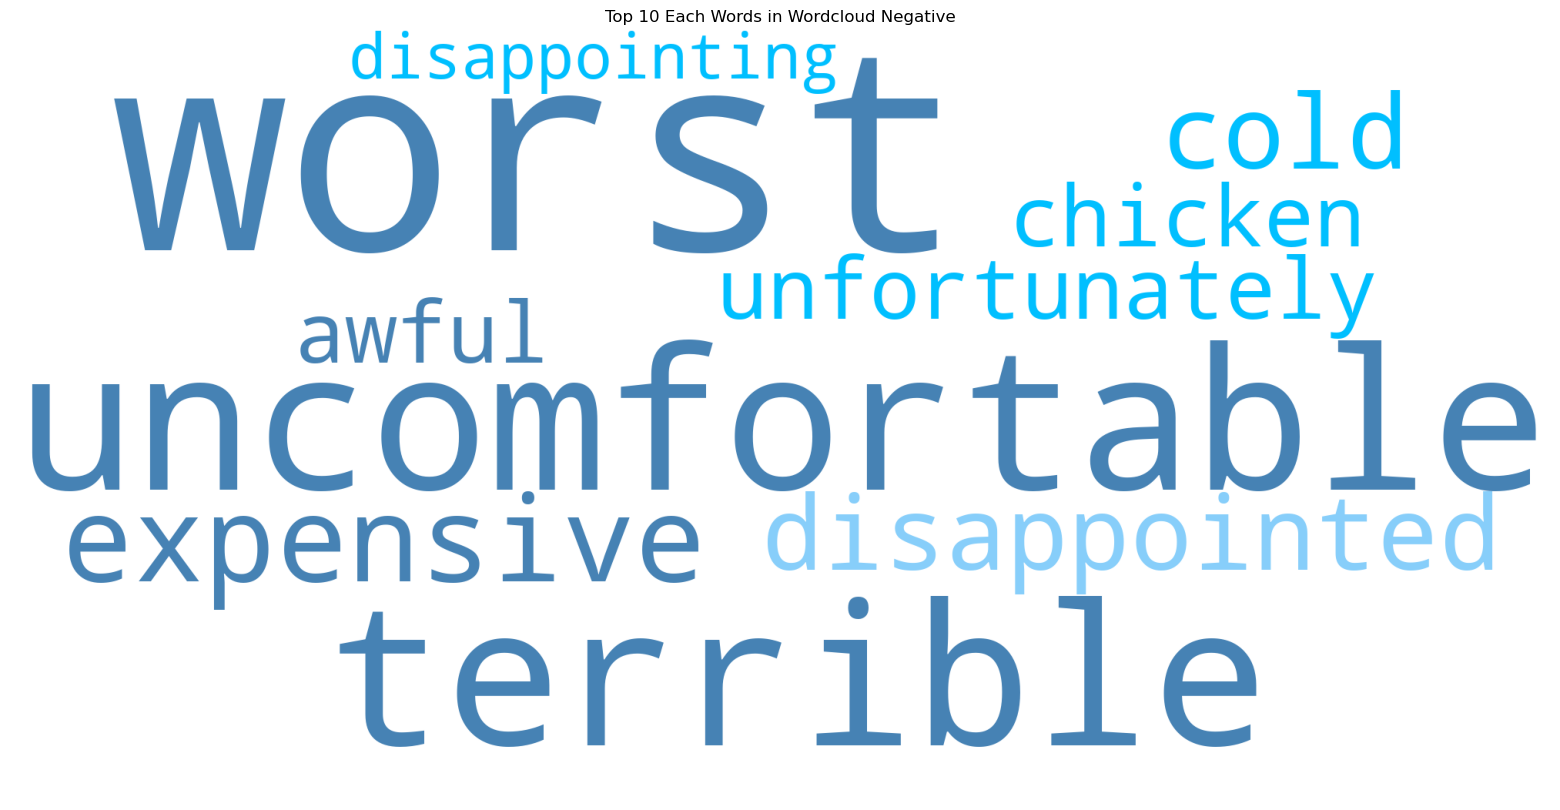

In [20]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#87CEFA", "#00BFFF", "#4682B4"]
    return np.random.choice(colors)

words = ' '.join([Text for Text in words_df[words_df['textblob_word_label']=='Negative']['word'].values.astype('U')])

# Get the frequency of each word
word_frequencies = {}
for word in words.split():
    word_frequencies[word] = word_frequencies.get(word, 0) + 1

# Get the top 10 words by frequency
top_words = dict(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10])

wordCloud = WordCloud(background_color='white', mode="RGB", width=2000, height=1000, color_func=color_func).generate_from_frequencies(top_words)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Top 10 Each Words in Wordcloud Negative")
plt.axis("off")
plt.show()